In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define path to your model folders
base_dir = '../src/model'

# Prepare empty list to store results
results = []

# Loop through each folder
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Search for classification_report CSV in the folder
        csv_files = glob.glob(os.path.join(folder_path, 'classification_report_*.csv'))
        
        for csv in csv_files:
            df = pd.read_csv(csv, index_col=0)
            
            # Calculate Macro Average manually
            macro_precision = df['precision'].mean()
            macro_recall = df['recall'].mean()
            macro_f1 = df['f1-score'].mean()
            
            results.append({
                'Model': folder,
                'Macro Precision': macro_precision,
                'Macro Recall': macro_recall,
                'Macro F1-Score': macro_f1
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

          Model  Macro Precision  Macro Recall  Macro F1-Score
0    distilbert         0.889861      0.885537        0.887591
1          lstm         0.735099      0.733454        0.730590
2  randomForest         0.814972      0.590040        0.565205
3           svm         0.749933      0.696633        0.714399
4      textblob         0.823570      0.753860        0.727626
5         vader         0.586508      0.595263        0.582026


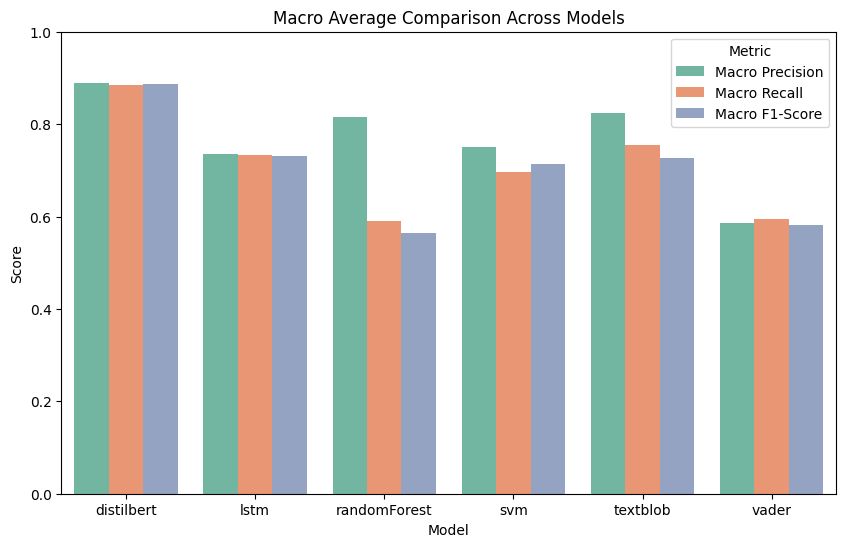

In [3]:
# Melt for seaborn plotting
df_melt = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Macro Average Comparison Across Models')
plt.ylim(0,1)
plt.ylabel('Score')
plt.savefig("combined_classification_report.png")
plt.show()


Computational Time

In [4]:
# Load data
df = pd.read_csv('combined_computational_time.csv')


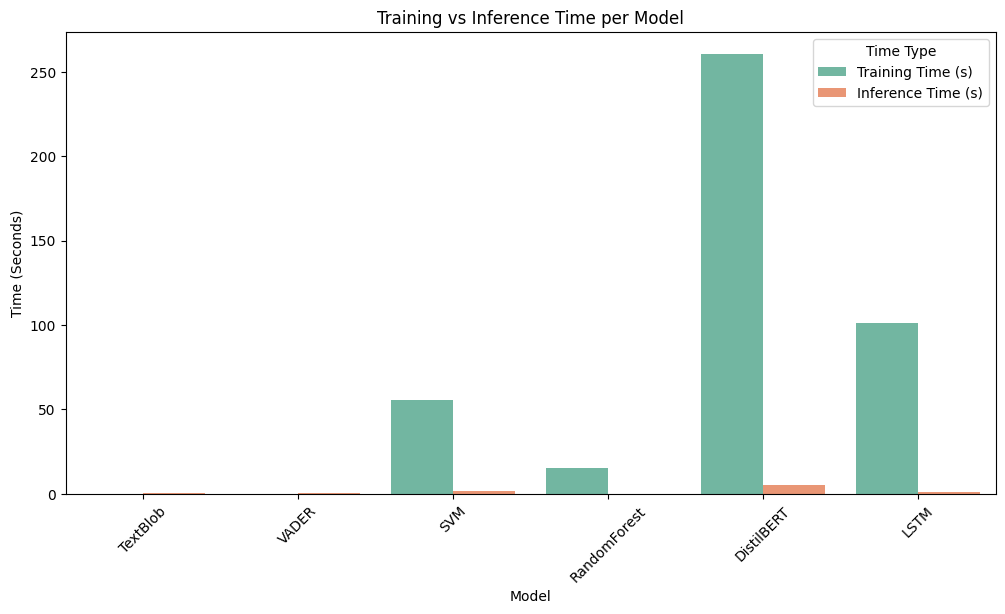

In [5]:
df_melted = df.melt(id_vars='Model', value_vars=['Training Time (s)', 'Inference Time (s)'],
                    var_name='Time Type', value_name='Time (s)')

plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Time (s)', hue='Time Type', data=df_melted, palette='Set2')
plt.title('Training vs Inference Time per Model')
plt.ylabel('Time (Seconds)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.savefig("combined_computational_time.png")
plt.show()


Overall Accuracy

In [6]:
# Prepare empty list to store results
accuracy_results = []

# Loop through each folder
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Search for overall_accuracy CSV in the folder
        csv_files = glob.glob(os.path.join(folder_path, 'overall_accuracy_*.csv'))
        
        for csv in csv_files:
            df = pd.read_csv(csv)
            # Extract the score where Metric is "Overall Accuracy"
            accuracy = df.loc[df['Metric'] == 'Overall Accuracy', 'Score'].values[0]
            # Append to list
            accuracy_results.append({
                'Model': folder,
                'Overall Accuracy': accuracy
            })

# Convert to DataFrame
accuracy_results_df = pd.DataFrame(accuracy_results)

# Print combined DataFrame
print(accuracy_results_df)


          Model  Overall Accuracy
0    distilbert          0.897833
1          lstm          0.768318
2  randomForest          0.707400
3           svm          0.755900
4      textblob          0.738900
5         vader          0.604700


In [7]:
accuracy_results_df.to_csv('combined_overall_accuracy.csv', index=False)

# Load overall accuracy
accuracy_df = pd.read_csv('combined_overall_accuracy.csv')


C:\Users\Christina Yap Xin Yi\AppData\Local\Temp\ipykernel_2956\3838613223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Overall Accuracy', data=accuracy_df, palette='Set2')


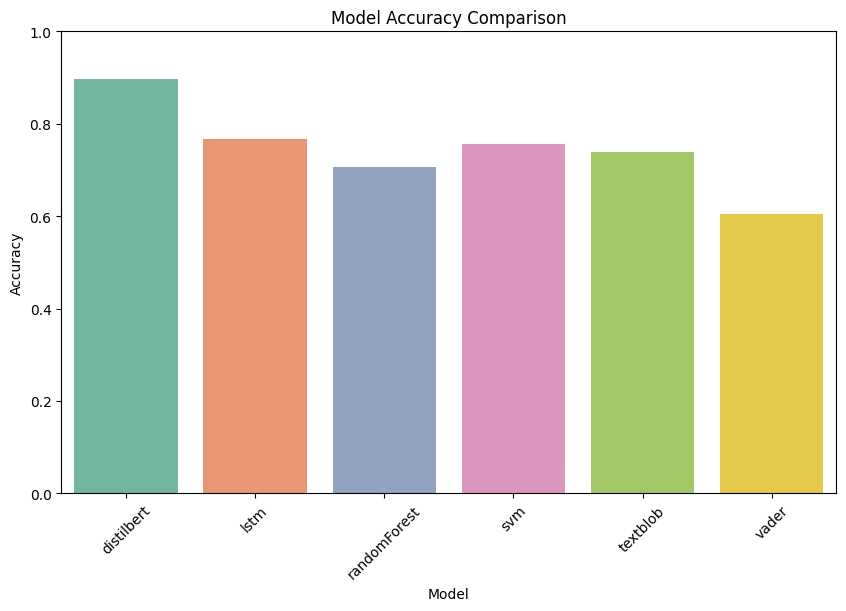

In [8]:
# Plot Accuracy Comparison
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Overall Accuracy', data=accuracy_df, palette='Set2')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.savefig("combined_overall_accuracy.png")
plt.show()